In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import Counter
from pathlib import Path
from matplotlib.ticker import MaxNLocator

sys.path.append("../helpers/")
from impresso_id import *

data_path = "data"

sns.set()

%load_ext autoreload
%autoreload 2

# Automatically tagged tables

In [2]:
df = pd.read_parquet(os.path.join(data_path, "NLL_auto_lite.parquet"))

## Exploration

In [3]:
tagset = df['tag'].unique()
print(tagset)
journals = df['journal'].unique()
print(journals)

['food prices' 'transport schedule' 'stock' 'currency rates'
 'sport results' 'weather' 'lotto' 'not a table' 'miscellaneous' 'radio'
 'election' 'cinema']
['luxwort' 'courriergdl' 'waechtersauer' 'lunion' 'avenirgdl' 'dunioun'
 'obermosel' 'luxzeit1858' 'volkfreu1869' 'luxland' 'buergerbeamten'
 'armeteufel' 'schmiede' 'gazgrdlux' 'diekwochen' 'demitock']


In [4]:
tag_color_palette = sns.color_palette(n_colors=len(tagset))
tag_colors = {'stock': tag_color_palette[0], 
             'transport schedule': tag_color_palette[1], 
             'food prices': tag_color_palette[2], 
             'currency rates': tag_color_palette[3], 
             'sport results': tag_color_palette[4], 
             'miscellaneous': tag_color_palette[5],
             'weather': tag_color_palette[6], 
             'not a table': tag_color_palette[7], 
             'radio': tag_color_palette[8],
             'election': tag_color_palette[9], 
             'lotto': tag_color_palette[10], 
             'cinema': tag_color_palette[11], 
             'remaining tags': 'snow'}

journal_colors = {'luxwort': 'gold', 
         'dunioun': 'blue', 
         'lunion': 'green',
         'obermosel': 'yellow',
         'avenirgdl': 'lime',
         'luxzeit1858': 'lightsteelblue',
         'waechtersauer': 'cyan',
         'courriergdl': 'magenta',
         'volkfreu1869': 'darkviolet',
         'luxland': 'lightcoral',
         'buergerbeamten': 'olive',
         'armeteufel': 'red',
         'schmiede': 'aquamarine',
         'gazgrdlux': 'maroon',
         'diekwochen': 'teal',
         'demitock': 'indigo',
         'remaining journals': 'purple'}

#### Tag distribution

In [5]:
df_count_per_tag = df.groupby('tag').count()['pid'].sort_values()

count_per_tag = {'remaining tags': 0}
for tag, count in df_count_per_tag.items():
    if count/sum(df_count_per_tag) < 0.035:
        count_per_tag['remaining tags'] += count
    else:
        count_per_tag[tag] = count

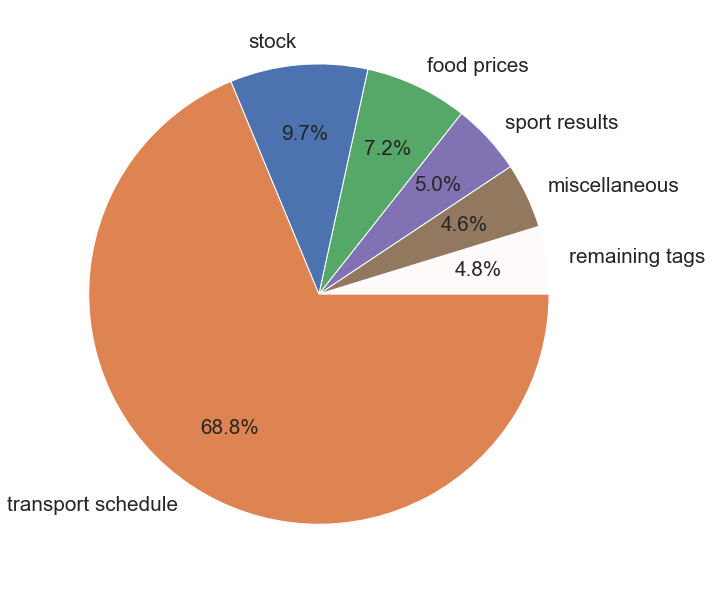

In [6]:
plt.figure(figsize=(10,10))
plt.pie(count_per_tag.values(), labels=list(count_per_tag.keys()), 
        colors=[tag_colors[k] for k, v in count_per_tag.items()], 
        autopct='%.1f%%', pctdistance=0.7, textprops={'fontsize': 'xx-large'})
#plt.title("Proportion of tags", fontsize='large')
plt.tight_layout()
plt.show()

#### Tag size distribution

This part of the code necessits a file containing the sizes of the images of newspaper pages to correctly function. This file is automatically generated when downloading images using *download_images_from_s3.py*.

In [8]:
with open("NLL_metadata_images.json", "r") as f:
    metadata = json.load(f)

df["area"] = df.apply(lambda x: x["width"]*x["height"], axis=1)
df['area_normalized'] = df.apply(lambda x: 100*x['area']/(metadata[x['pid']]['height']*metadata[x['pid']]['width']) if x['pid'] in metadata else 0, axis=1)

In [9]:
df_area_sum_per_tag = df.groupby('tag').sum()['area_normalized'].sort_values()

area_sum_per_tag = {'remaining tags': 0}
for tag, count in df_area_sum_per_tag.items():
    if count/sum(df_area_sum_per_tag) < 0.015: #and area_sum_per_tag['remaining tags']/sum(df_area_sum_per_tag) < 0.02:
        area_sum_per_tag['remaining tags'] += count
    else:
        area_sum_per_tag[tag] = count

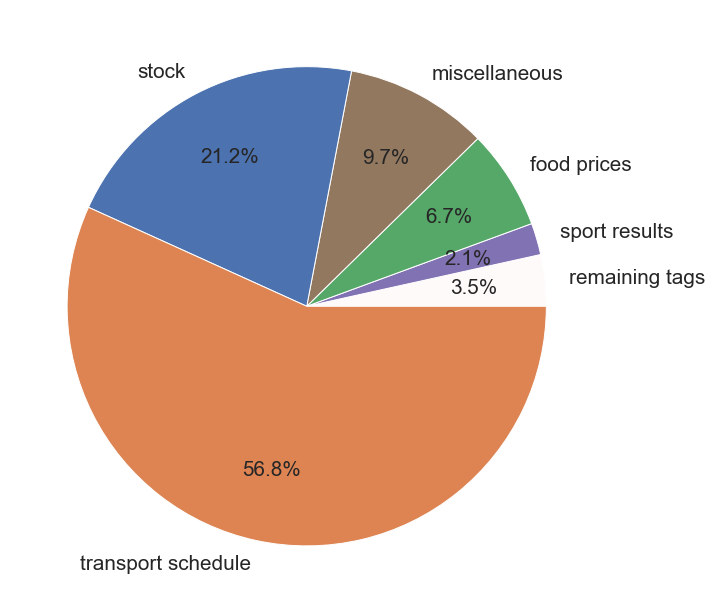

In [10]:
plt.figure(figsize=(10,10))
plt.pie(area_sum_per_tag.values(), labels=list(area_sum_per_tag.keys()), 
        colors=[tag_colors[k] for k, v in area_sum_per_tag.items()], 
        autopct='%.1f%%', pctdistance=0.7, textprops={'fontsize': 'xx-large'})
#plt.title("Proportion of tags", fontsize='large')
plt.tight_layout()
plt.show()